In [76]:
import numpy as np                   # advanced math library
import pandas as pd
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

#from keras.datasets import mnist     # MNIST dataset is included in Keras
import keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Dropout, Activation,Input
 # Types of layers to be used in our model
from keras.utils import to_categorical

                      # NumPy related tools

In [23]:
train_data = pd.read_csv('C:/Users/User/Downloads/mnist_train.csv')
test_data = pd.read_csv('C:/Users/User/Downloads/mnist_test.csv')
tarin_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)


X_train = np.asarray(train_data.iloc[:, 1:]).astype("float32")
print('X_train: ', X_train.shape)
y_train = np.asarray(train_data['label'])
y_train = to_categorical(y_train, num_classes=10)
print('y_train: ', y_train.shape)
X_test = np.asarray(test_data.iloc[:, 1:]).astype("float32")
print('X_test: ', X_test.shape)
y_test = np.asarray(test_data['label'])
y_test = to_categorical(y_test, num_classes=10)
print('y_test: ', y_test.shape)

print(y_train)


X_train:  (60000, 784)
y_train:  (60000, 10)
X_test:  (10000, 784)
y_test:  (10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


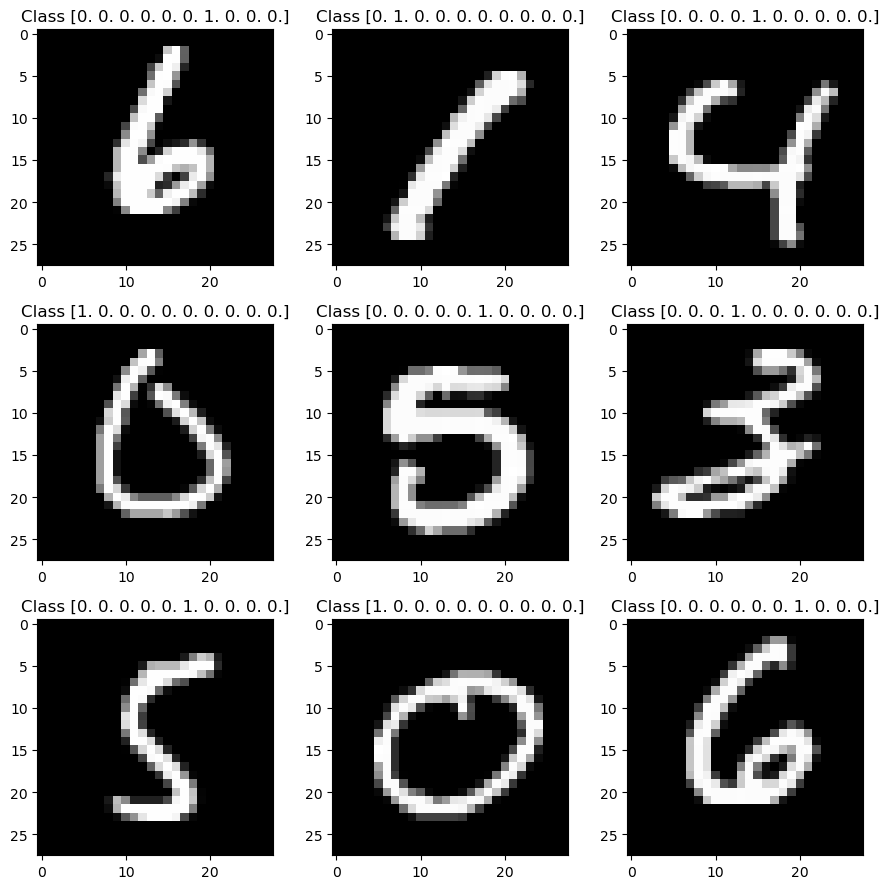

In [25]:
x_train = X_train.reshape(-1, 28, 28)
x_test = X_test.reshape(-1, 28, 28)

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [27]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(x_train[num])

0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0   63  154  153    7    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0   13   95  206  253  252   56    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0   10  172  252  252  253  252   56    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0   51  179  252  252  102   40  139   31    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0   60  241  255  247  100    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0   13  209  252  234   65    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0   10  172  252  252  100    0    0    0   

In [29]:
model = Sequential()

In [78]:
model = Sequential([
    Input(shape=(784,)),  # Определяем входные данные
    Dense(512, activation='relu')  # Добавляем плотный слой
])


In [80]:
model.add(Activation('relu'))

In [82]:
model.add(Dropout(0.2))

In [84]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [86]:
model.add(Dense(10))

In [88]:
model.add(Activation('softmax'))

In [90]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
EPOCHS = 5
model.fit(X_train, y_train,
          batch_size=128, epochs=EPOCHS,
          verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8070 - loss: 9.7268
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9183 - loss: 0.5668
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9376 - loss: 0.2784
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9512 - loss: 0.1875
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9555 - loss: 0.1720


In [96]:
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9575 - loss: 0.1560
Test score: 0.13109983503818512
Test accuracy: 0.9652000069618225


In [98]:
predict_x = model.predict(X_test) 
predicted_classes = np.argmax(predict_x,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == np.argmax(y_test, axis=1))[0]

incorrect_indices = np.nonzero(predicted_classes != np.argmax(y_test, axis=1))[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


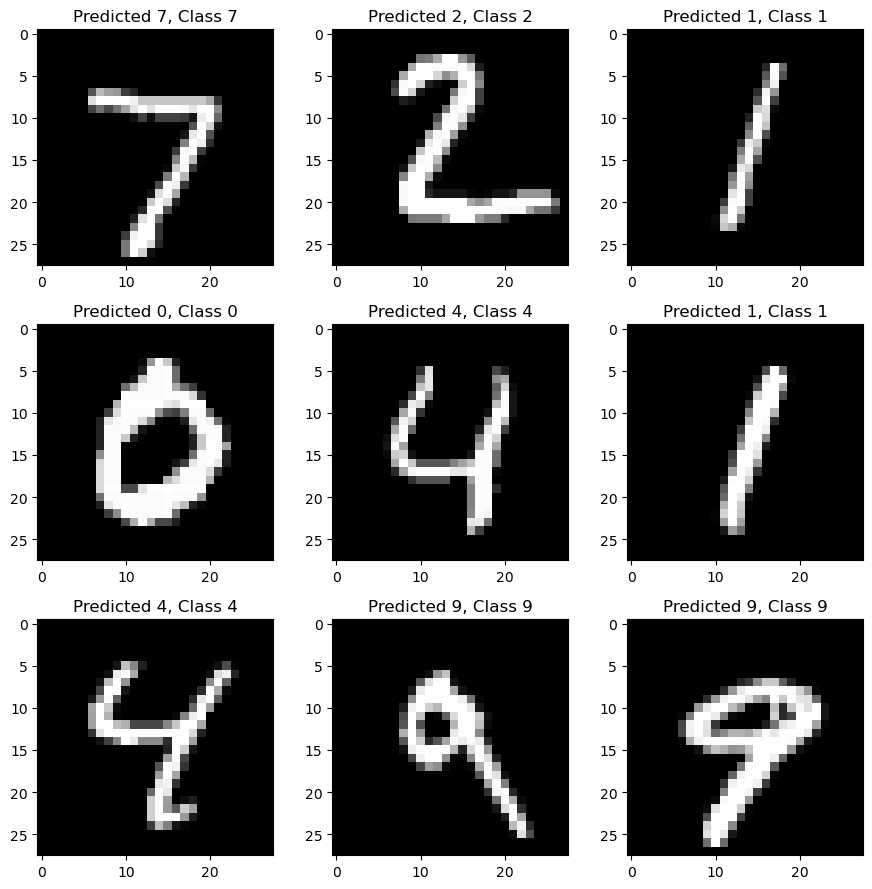

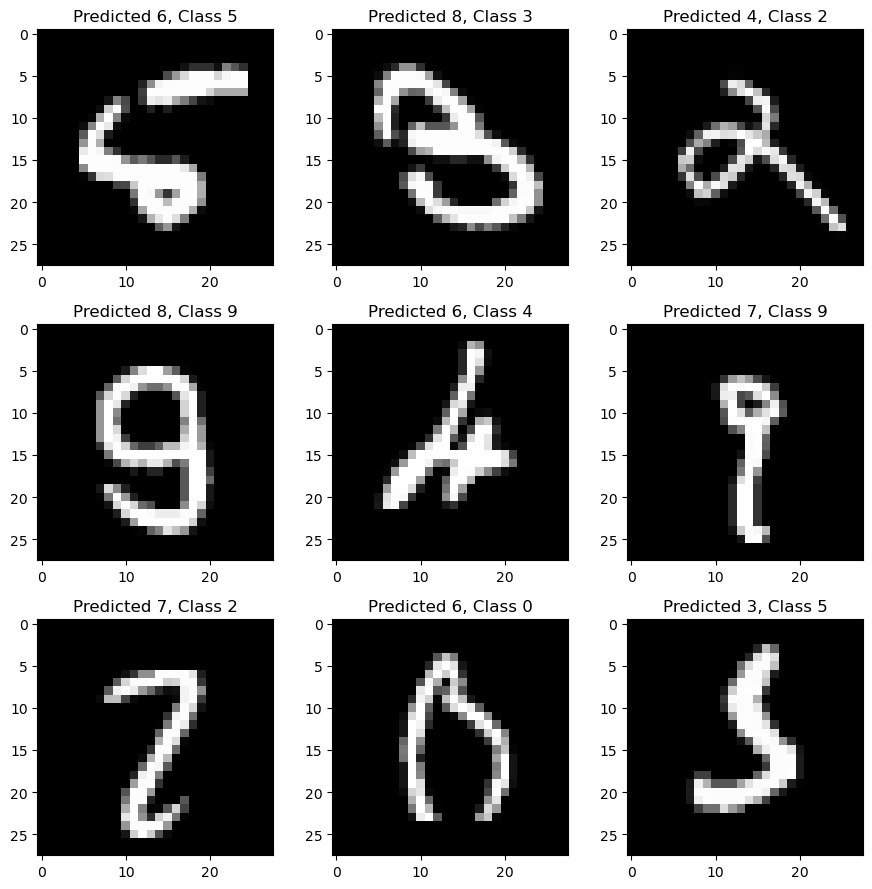

In [100]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], np.argmax(y_test[correct])))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], np.argmax(y_test[incorrect])))
    
plt.tight_layout()